In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('C:/Users/vineet/Desktop/Concrete_Data.csv')

In [3]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast Furnace Slag               1030 non-null float64
Fly Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse Aggregate                 1030 non-null float64
Fine Aggregate                   1030 non-null float64
Age (day)                        1030 non-null int64
Concrete compressive strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


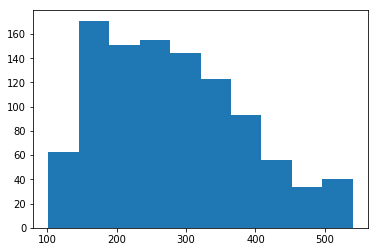

In [6]:
plt.hist(dataset["Cement "])
plt.show()

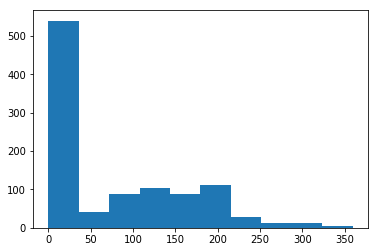

In [7]:
plt.hist(dataset['Blast Furnace Slag '])
plt.show()

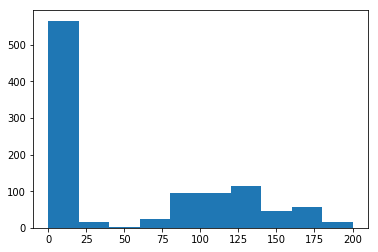

In [8]:
plt.hist(dataset['Fly Ash '])
plt.show()

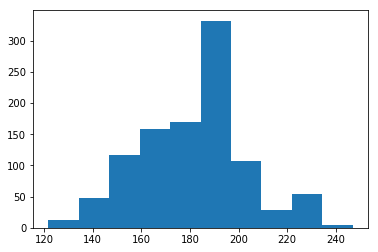

In [9]:
plt.hist(dataset['Water '])
plt.show()

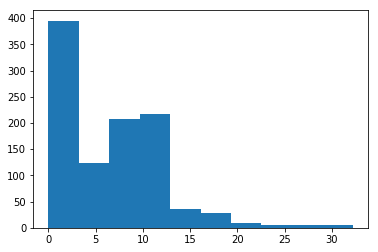

In [10]:
plt.hist(dataset['Superplasticizer'])
plt.show()

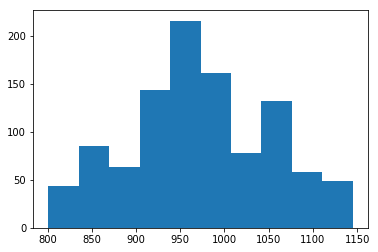

In [11]:
plt.hist(dataset['Coarse Aggregate'])
plt.show()

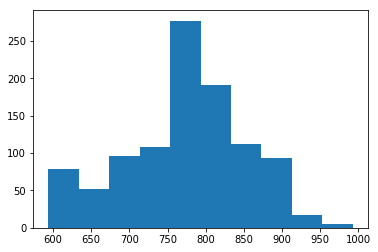

In [12]:
plt.hist(dataset['Fine Aggregate'])
plt.show()

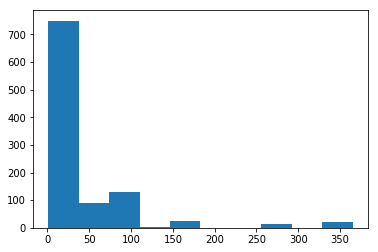

In [13]:
plt.hist(dataset['Age (day)'])
plt.show()

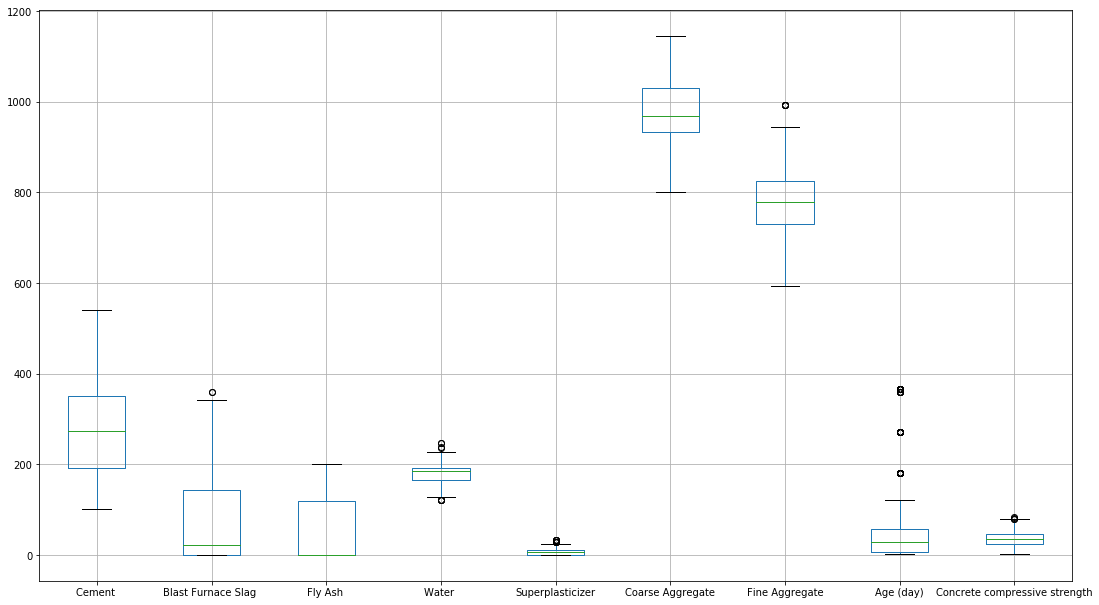

In [14]:
dataset.groupby('Concrete compressive strength').size()
plt.figure;
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
bp=dataset.boxplot()
 #(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False)
plt.show()

In [51]:
X = np.array(dataset.drop("Concrete compressive strength", axis=1)) # Numerical data
y = np.array(dataset["Concrete compressive strength"]) # Label (Concrete compressive strength)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [54]:
pipeline = Pipeline([
    ("std_scaler", StandardScaler()) # feature scaling
    ])

X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.fit_transform(X_test)

In [55]:
# Fine-tuning
          

hyperparameters = {"n_estimators":[10, 15, 30],
                        "max_features":[2, 3, 4, 5],
                        "max_depth":[5, 10, 15, 20, 30],
                        "bootstrap":[True, False],
                        "warm_start":[True, False]}

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
rand_forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(rand_forest_reg, hyperparameters, cv=10,scoring="neg_mean_squared_error")

grid_search.fit(X_train_preprocessed, y_train)

model = grid_search.best_estimator_

joblib.dump(model, "concrete_model.pkl")

model = joblib.load("concrete_model.pkl")

In [58]:
predictions = model.predict(X_test_preprocessed)

In [59]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 5.459910482613733


In [60]:
r2 = model.score(X_test_preprocessed, y_test)
r = np.sqrt(r2)
print("Correlation:", r)

Correlation: 0.9457637643295335


In [61]:
print("Predictions:", predictions[:50])
print("Labels:", y_test[:50])

Predictions: [50.257      70.21266667 21.97433333 70.039      25.08066667  9.10866667
 26.221      28.73333333 61.692      26.814      29.58566667 19.97666667
 27.18266667 42.36033333 56.36633333 13.33533333 26.19466667 33.51
 36.289      27.85933333 20.42633333 41.21866667 26.41033333 52.621
 40.96766667 32.94166667 23.526      54.38366667 33.091      31.59366667
 39.17866667 36.256      32.98766667 17.876      18.941      34.20466667
 28.16       28.583      56.199      68.21333333 55.74116667 10.36733333
 36.48633333 50.754      33.973      17.577      49.645      23.019
 27.69466667 15.96366667]
Labels: [51.73 70.7  21.29 58.52 30.14  8.37 29.72 28.24 67.11 29.73 29.59 20.28
 28.47 34.74 55.94 12.73 25.89 26.97 37.44 27.92 12.79 44.21 26.23 56.62
 55.9  33.31 20.77 56.61 25.2  34.29 48.15 36.35 33.   17.58  8.49 32.24
 27.92 25.1  55.16 71.3  44.42  8.54 38.22 52.42 31.25  9.45 52.12 21.97
 21.95 17.54]
